# Taller 1
##2. Concéptos básicos de señales.
1. Evaluar la expresión $$\int^\infty_{-\infty}t^2e^{-sin(t)}cos(2t)\delta(2t-2\pi)dt$$
Nota: Consultar las propiedas de selectividad y escala en el
tiempo de la función impulso unitario. Comprobar el resultado
en simulación con la librería SymPy.

###Solución
Si se reemplaza $$X(t)=t^2e^{-sin(t)}cos(2t)$$ tendríamos que: $$\int^\infty_{-\infty}X(t)\delta(2t-2\pi)dt$$ Y por las propiedades del Delta Dirac: $$\delta(2t-2\pi)=\delta(2(t-\pi))=\frac{\delta(t-\pi)}{2}$$ por lo tanto:
$$\int^\infty_{-\infty}X(t)\frac{\delta(t-\pi)}{2}dt=\frac{1}{2}\int^\infty_{-\infty}X(t)\delta(t-\pi)dt=\frac{1}{2}X(\pi)$$
$$\frac{1}{2}X(\pi)=\frac{1}{2}\pi^2e^{-sin(\pi)}cos(2\pi)=\frac{1}{2}*\pi^2*e^{0}*1$$
$$X(\pi)=\frac{\pi^2}{2}$$





In [37]:
# Solución 1. 
import sympy as sym
from sympy import DiracDelta
from sympy import integrate
from sympy import oo


t= sym.symbols('t', real=True)
T=(t**2)*sym.exp(-sym.sin(t))*sym.cos(2*t)
sym.integrate(T*sym.DiracDelta(2*t-2*sym.pi), (t,-oo,oo))


pi**2/2

2.   Sea $$x(t)=u(t-t_0)-u(t-nt_0)-k\delta(t-mt_0)$$ Determine
el valor de k para el cual $$\int^\infty_{-\infty}x(t)dt=0$$ Comprobar el resultado en simulación con la librería SymPy.

###Solución
Por sus propiedades podemos separar la integral de la siguiente forma
$$\int^\infty_{-\infty}u(t-t_0)-u(t-nt_0)-k\delta(t-mt_0)dt=0$$
$$\int^\infty_{-\infty}u(t-t_0)-u(t-nt_0)dt-k\int^\infty_{-\infty}\delta(t-mt_0)dt=0$$
$$\int^{nt_0}_{t_0}1dt-k=0$$
$$nt_0-t_0=k$$
$$t_0(n-1)=k$$

Como lo demuestra la simulación con $t_0=3$,$n=2$ y $k=3(2-1)=3$. Debido a la funcionalidad de $\delta$ el valor de m no tiene repercusiones en el resultado.
El rectángulo de la gráfica muestra un área de $A_u=b*h=3*1=3$ y el área calculada del $\delta$ es $A_\delta=-3$ por lo que en total nos da un area (integral) de 0.

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


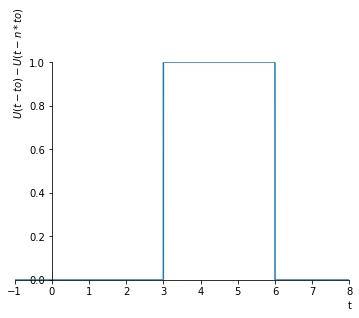

-3

In [47]:
# Solución 1. 
import sympy as sym
from sympy import DiracDelta
from sympy import integrate
from sympy import oo

t, m= sym.symbols('t, m', real=True)



uto = sym.Heaviside(t-to)
unto = sym.Heaviside(t-2*to) #n=2
xt = uto-unto
dd = sym.DiracDelta(t-m*to)

sym.plot(xt.subs({to : 3}), (t, -1, 8), ylabel=r'$U(t-to)-U(t-n*to)$')

#sym.integrate(xt, (t,to,n*to))
sym.integrate(-3*dd, (t,-oo,oo)) #k=3

3.   Consulte en qué consisten las señales cuasiperiódicas. Luego,
demuestre la periodicidad o no de las siguientes señales:

$$x(t) = 3 cos(\omega t)$$
$$x(t) = 2 sin(\omega t +\pi)$$
$$x(t) = 3 sin(\sqrt{3}t) + 3 sin(5t) - 2 cos(t/\sqrt{3})$$
$$x(t) = 3 sin(4t) - 2 cos(50t) + 2 cos(10t)$$
$$x(t) = e^{j\omega t}$$

Graﬁque cada una de las señales anteriores en Python utilizando
arreglos de numpy (dibuje tres periodos si es el caso).


###Solución

1. $x(t) = 3 cos(\omega t)$

Excluimos el 3 al inicio ya que no afecta internamente al coseno.
$$ cos(\omega t)= cos(\omega (t+T))$$
$$cos(\omega (t+T))=cos(\omega t)cos(\omega T)-sin(\omega t)sin(\omega T)$$
Para que la igualdad se cumpla $cos(\omega T)=1$ y $sin(\omega T)=0$ por lo tanto $\omega T=2\pi$ pero si recordamos la definición $\omega =\frac{2\pi}{T}$. Entonces $\frac{2\pi}{T}T=2\pi$. Son iguales, $x(t)$ es periódic.

2. $x(t) = 2 sin(\omega t +\pi)$

Por propiedades trigonométricas tenemos que $2 sin(\omega t + \pi)=2 cos(\omega t)$. Siguiendo la lógica anterior, $x(t)$ es periódica.

3. $x(t) = 3 sin(\sqrt{3}t) + 3 sin(5t) - 2 cos(t/\sqrt{3})$

Para que sea periódica, debe cumplir que $\frac{\omega_1}{\omega_2} ; \frac{\omega_2}{\omega_3} ; \frac{\omega_3}{\omega_1}\in \mathbb{Q}$ y ya que $w_1=\sqrt{3}$ y $w_3=\frac{1}{\sqrt{3}}$, $x(t)$ es aperiódica.

4. $x(t) = 3 sin(4t) - 2 cos(50t) + 2 cos(10t)$

Siendo $\omega_1=4 ; \omega_2=50 ; \omega_3=10$ vemos que:
$$\frac{\omega_1}{\omega_2} ; \frac{\omega_2}{\omega_3} ; \frac{\omega_3}{\omega_1}\in \mathbb{Q}$$ Entonces, $x(t)$ es cuasiperiódica.

5. $x(t) = e^{j\omega t}$

Escrito de otra forma $x(t) = e^{j\omega t} = cos(\omega t)+jsin(\omega t)$

Como se aprecia, son dos funciones periódicas aunque en diferentes ejes, por lo que $x(t)$ es periódica.

(-3.2, 3.2)

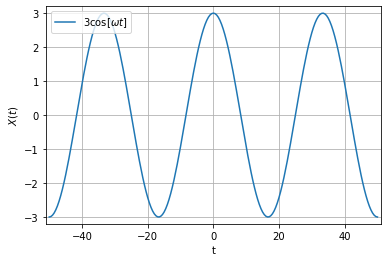

In [77]:
import numpy as np
import matplotlib.pyplot as plt

#Gráfica señal 1
N=50
w=3*np.pi/50
A=3

x1=np.linspace(-N,N,4*N+1)
y1 = A*np.cos(w*x1)

plt.plot(x1,y1,label="$3\cos[\omega t]$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-N-1,N+1)
plt.xlabel("t")
plt.ylabel("$X(t)$")
plt.ylim(-3.2,3.2)

(-2.2, 2.2)

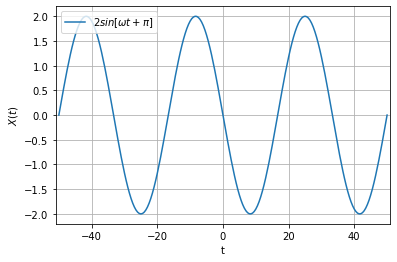

In [76]:
#Gráfica señal 2
N=50
w=3*np.pi/50
A=2

x1=np.linspace(-N,N,4*N+1)
y1 = A*np.sin(w*x1+np.pi)


plt.plot(x1,y1,label="$2sin[\omega t+\pi]$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-N-1,N+1)
plt.xlabel("t")
plt.ylabel("$X(t)$")
plt.ylim(-2.2,2.2)

(-9.0, 9.0)

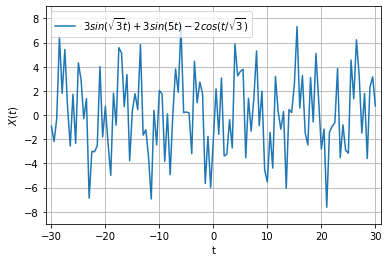

In [75]:
#Gráfica señal 3
N=30
A=3
B=3
C=-2
D=np.sqrt(3)
E=5
F=1/D
x1=np.linspace(-N,N,4*N+1)
y1 = A*np.sin(D*x1)+B*np.sin(E*x1)+C*np.cos(F*x1)


plt.plot(x1,y1,label="$3 sin(\sqrt{3}t) + 3 sin(5t) - 2 cos(t/\sqrt{3})$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-N-1,N+1)
plt.xlabel("t")
plt.ylabel("$X(t)$")
plt.ylim(-9,9)


(-10.0, 10.0)

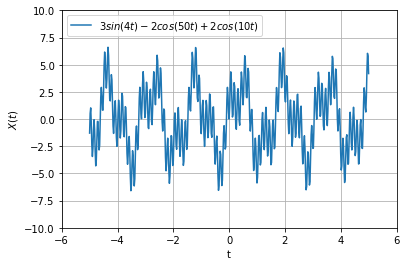

In [91]:
#Gráfica señal 4
N=5
A=3
B=-2
C=2
D=4
E=50
F=10
x1=np.linspace(-N,N,100*N+1)
y = A*np.sin(D*x1)+B*np.cos(E*x1)+C*np.cos(F*x1)
plt.plot(x1,y,label="$3 sin(4t) - 2 cos(50t) + 2 cos(10t)$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-N-1,N+1)
plt.xlabel("t")
plt.ylabel("$X(t)$")
plt.ylim(-10,10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


(-1.2, 1.2)

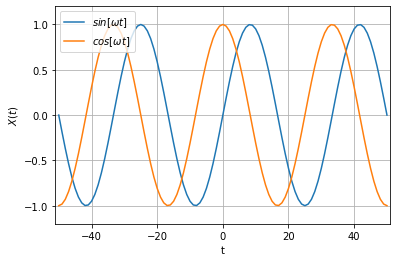

In [101]:
#Gráfica señal 5
N=50
w=3*np.pi/50
A=3
j=np.sqrt(-1)
x1=np.linspace(-N,N,2*N+1)
y1 = np.sin(w*x1)
y2 = np.cos(w*x1)


plt.plot(x1,y1,label="$sin[\omega t]$")
plt.plot(x1,y2,label="$cos[\omega t]$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-N-1,N+1)
plt.xlabel("t")
plt.ylabel("$X(t)$")
plt.ylim(-1.2,1.2)